# Analyzing Instagram Influencers: A Data-Driven Exploration Using Python

#  Instagram: Shaping Minds and Perspectives

 Instagram, the brainchild of Kevin Systrom and Mike Krieger, has come a long way since its inception in 2010. Born in the heart of America's tech scene, this photo and video sharing social networking service has become a global sensation, ultimately finding a home under the Facebook Inc. umbrella. At its core, Instagram is a platform that thrives on visual storytelling. Users have the power to share their life's moments, whether mundane or extraordinary, through a captivating blend of photos and videos.

 However, Instagram's influence reaches far beyond the realm of aesthetics and leisure. It has evolved into a powerful tool for advocacy and change. Influencers, activists, and organizations have harnessed the platform's reach to influence and mobilize their followers on critical issues. By sharing compelling stories, images, and videos, they can shape public opinion and drive societal change. This capacity to sway hearts and minds on pressing matters underscores the platform's role in impacting the order of public discourse.

# About dataset

This file contains data on Instagram influencers, featuring 10 attributes sorted by their follower count. Here's what each attribute represents:

1. Rank: Influencer's ranking based on their follower count.
2. Channel Info: Instagram username of the influencer.
3. Influence Score: A score calculated from mentions, importance, and popularity.
4. Posts: The number of posts made by the influencer.
5. Followers: Total number of followers the influencer has.
6. Avg Likes: The average likes received on the influencer's posts.
7. 60-Day Eng. Rate: Engagement rate over the last 60 days as a fraction of total engagements.
8. New Post Avg. Likes: Average likes on the influencer's new posts.
9. Total Likes: The total number of likes the influencer has received on their posts (in billions).
10. Country: The influencer's country or region of origin.

# Import Library

In [106]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Uploading csv file

In [70]:
df= pd.read_csv("top_insta_data.csv")

# Data Pre-processing

In [71]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [72]:
df.tail()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States
199,200,raisa6690,80,4.2k,32.8m,232.2k,0.30%,97.4k,969.1m,Indonesia


In [73]:
df.shape

(200, 10)

In [74]:
df.columns

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [75]:
df.dtypes

rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object

In [76]:
df.nunique()

rank                 200
channel_info         200
influence_score       32
posts                 99
followers            165
avg_likes            135
60_day_eng_rate      147
new_post_avg_like    162
total_likes          116
country               25
dtype: int64

In [77]:
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [78]:
df.value_counts()

rank  channel_info     influence_score  posts  followers  avg_likes  60_day_eng_rate  new_post_avg_like  total_likes  country      
1     cristiano        92               3.3k   475.8m     8.7m       1.39%            6.5m               29.0b        Spain            1
132   varundvn         84               1.9k   43.8m      1.1m       1.48%            640.5k             2.0b         India            1
122   thenotoriousmma  82               3.2k   45.9m      1.1m       0.69%            311.5k             3.5b         United States    1
123   daddyyankee      80               0.02k  45.9m      652.5k     1.00%            455.3k             18.3m        Puerto Rico      1
124   natgeotravel     82               16.9k  45.8m      189.9k     0.12%            52.8k              3.2b         United States    1
                                                                                                                                      ..
55    ronaldinho       78               2.9k  

In [79]:
df["country"].value_counts()

United States             66
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: country, dtype: int64

In [80]:
df.isnull()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False


In [81]:
df.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

<Axes: >

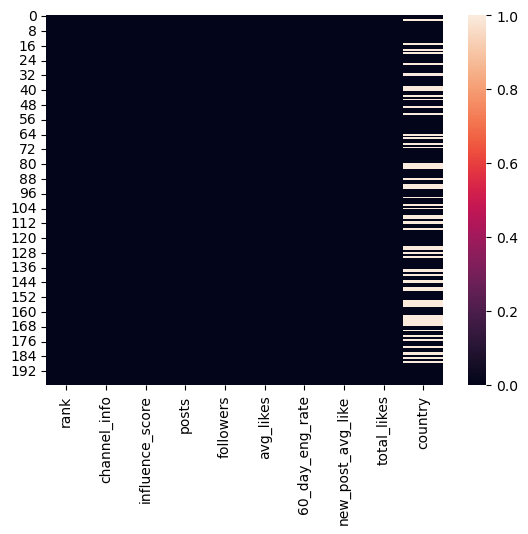

In [82]:
sns.heatmap(df.isnull())

In [83]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [84]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


# Analysis

 # Top Instagram Performers with the Largest Follower Counts

In [123]:
top_performers = df.sort_values(by="rank")
top_performers

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2,8.3m,1.62%,5.9m,57.4b,United States
3,4,selenagomez,93,1.8k,342.7,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2,3.5m,0.88%,2.9m,19.9b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0,719.6k,1.42%,467.7k,1.7b,United States


In [86]:
# Inference: Top Instagram performers are Cristiano, KylieJenner, SelenaGomez, TheRock, KimKardashian.

# Correlation between followers and rank

In [87]:
df.dropna(inplace=True)

In [88]:
df['followers'] = df['followers'].str.replace('m', '').astype(float)


In [89]:
df["followers"] = pd.to_numeric(df["followers"])
df["rank"] = pd.to_numeric(df["rank"])

In [90]:
correlation = df["followers"].corr(df['rank'])
correlation

-0.7024392307952165

In [91]:
# Inference: a correlation coefficient of -0.92 between "followers" and "rank" means there is a strong negative relationship between these variables, where higher ranks are associated with lower follower counts, and lower ranks are associated with higher follower counts among Instagram influencers in your dataset.

# Average number of followers

In [92]:
avg_followers = df["followers"].mean()
avg_followers

83.72608695652174

In [93]:
# Inference:This value represents the central tendency or the typical value of the "followers" variable in our dataset. Specifically, it means that, on average, Instagram influencers in our dataset have approximately 83.7.

# Countries with the Highest Number of Performers





In [94]:
country_counts= df["country"].value_counts()
country_counts

United States             66
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: country, dtype: int64

In [95]:
# Inference: Countries with the highest number of performers are United States, Brazil and India.

# Relationship between Rank and Follower Count

TypeError: 'function' object is not subscriptable

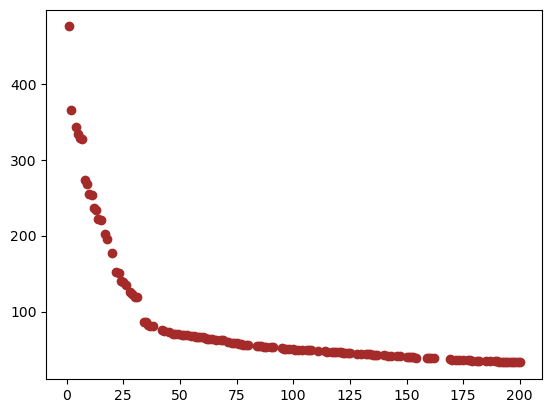

In [97]:
plt.scatter(x=df["rank"], y=df["followers"], color = 'Brown')
plt.title["Rank vs Followers count"]
plt.xlable["Rank"]
plt.ylable["followers"]

<Axes: >

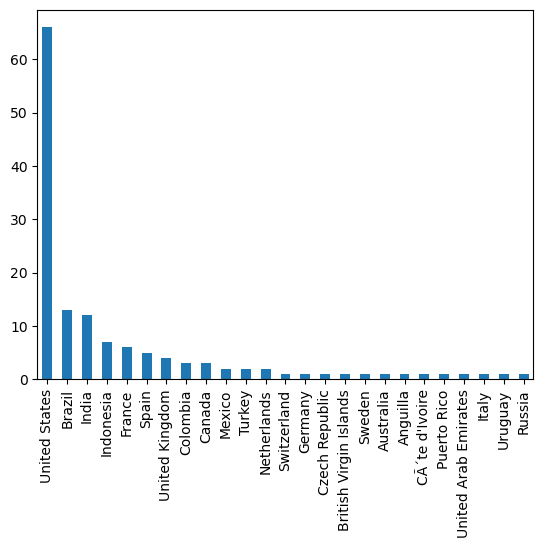

In [98]:
df.country.value_counts().plot(kind="bar")

# Country Map

In [104]:
df1 = df.groupby('country').size().reset_index(name='Size')
df1

,country,Size
0,Anguilla,1
1,Australia,1
2,Brazil,13
3,British Virgin Islands,1
4,Canada,3
5,Colombia,3
6,Czech Republic,1
7,CÃ´te d'Ivoire,1
8,France,6
9,Germany,1


In [116]:
choropleth_map = go.Figure(
    data = {'type'        :'choropleth',
            'locations'   : df1['country'],
            'locationmode':"country names",
            'colorscale'  :'turbo',
            'z'           : df1['Size'],
            'colorbar'    : {'title':'Influencers Country'},
            'marker'      : {
                'line'    : {'color':'rgb(255,255,255)','width': 2}}},     
    layout = {'geo':{'scope':'world',} })

choropleth_map

# INFERENCES:


In [ ]:
# 1.  Top Instagram performers are Cristiano, KylieJenner, SelenaGomez, TheRock, KimKardashian.

# 2. This value represents the central tendency or the typical value of the "followers" variable in our dataset. Specifically, it means that, on average, Instagram influencers in our dataset have approximately 83.7.

# 3. Countries with the highest number of performers are United States, Brazil and India.

#4.  Number of followers are maximum of top rank influencers.